# I've *Bean* There, Done That, *Brew*(Bro): Predicting the Quality of Coffee Taste from Cupping Score Features Using the k-Nearest Neighbor (kNN) Classification Algorithm 

**BY:** <br> 
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

## Problem

## **☕Data Discussion**

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.

<br>

**Features and Attributes:**

**Certification Information** <br>
`Country of Origin:` The country where the coffee beans were grown. <br>
`Farm Name:` The name of the farm where the coffee beans were produced. <br>
`Lot Number:` The unique identifier for a specific lot of coffee beans. <br>
`Mill:` The mill or processing facility where the coffee beans were processed. <br>
`ICO Number:` The International Coffee Organization (ICO) number associated with the coffee. <br>
`Company:` The company or organization responsible for the coffee. <br>
`Altitude:` The altitude at which the coffee beans were grown. <br>
`Region:` The region or geographical area where the coffee beans were produced. <br>
`Producer:` The individual or entity that produced the coffee beans. <br>
`Number of Bags:` The total number of bags of coffee beans. <br>
`Bag Weight:` The weight of each bag of coffee beans. <br>
`In-Country Partner:` The local partner or representative involved in the coffee certification process. <br>
`Harvest Year:` The year when the coffee beans were harvested. <br>
`Grading Date:` The date when the coffee beans were graded. <br>
`Owner:` The owner or owner's representative of the coffee beans. <br>
`Variety:` The variety or type of coffee beans. <br>
`Status:` The status or condition of the coffee beans. <br>
`Processing Method:` The method used to process the coffee beans. <br>

**Cupping Scores** <br>
`Aroma:` The score or rating for the aroma of the coffee. <br>
`Flavor:` The score or rating for the flavor of the coffee. <br>
`Aftertaste:` The score or rating for the aftertaste of the coffee. <br>
`Acidity:` The score or rating for the acidity of the coffee. <br>
`Body:` The score or rating for the body or mouthfeel of the coffee. <br>
`Balance:` The score or rating for the balance of the coffee's flavors. <br>
`Uniformity:` The score or rating for the uniformity of the coffee. <br>
`Clean Cup:` The score or rating for the cleanliness of the coffee. <br>
`Sweetness:` The score or rating for the sweetness of the coffee. <br>
`Total Cup Points:` The total score or rating for the coffee based on cupping evaluation. <br>
`Overall:` The overall score or rating for the coffee. <br>

**Green Analysis** <br>
`Moisture:` The moisture content of the green coffee beans. <br>
`Color:` The color of the green coffee beans. <br>
`Defects:` The number of defects found in the coffee beans, numbers of full defects are calculated on a basis of 350 grams of green coffee sample. <br>
`Category One Defects:` The number of defects categorized as "Category One." Identified as full black or sour bean, pod/cherry, and large or medium sticks or stones. <br>
`Category Two Defects:` The number of defects categorized as "Category Two." Identified as parchment, hull/husk, broken/chipped, insect damage, partial black or sour, shell, small sticks or stones, water damage. <br>
`Quakers:` The presence or number of quaker beans, which are underdeveloped or defective beans. <br>

**Sample Information** <br>
`Expiration:` The expiration date of the coffee certification. <br>
`Certification Body:` The organization responsible for certifying the coffee. <br>
`Certification Address:` The address of the certification body. <br>
`Certification Contact:` The contact information for the certification body. <br>

<br>

**Citation** 

ehmtang. (2023). Coffee Quality Institute Arabica Reviews May2023. (<a href="https://www.kaggle.com/datasets/erwinhmtang/coffee-quality-institute-reviews-may2023/data">Kaggle.com</a>) <br>
Coffee Quality Institute, & Eximware Inc. (2014). Home - Q Coffee System. (<a href="https://database.coffeeinstitute.org/">Coffeeinstitute.org</a>) <br>

### **🔃 Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

### 📩 Load Dataset

In [2]:
df = pd.read_csv('coffee.csv')
df

,coffee_id,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,...,Color,Category_One_Defects,Category_Two_Defects,Quakers,Expiration,Certification_Body,Certification_Address,Certification_Contact,parsed_expiration,parsed_grading_date
0,#647123,Guatemala,san francisco cotzal,11/441/50,"inmobiliaria e inversiones dos mil, s.a.",11/441/50,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,...,Green,0,1,3.0,June 22 2023,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2023-06-22,2022-06-22
1,#927000,Guatemala,San jose del lago,11/15/95,San jose del lago,11/15/95,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,2,1.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
2,#902618,Guatemala,varias fincas,11/15/51,El Trèbol/Lìnea Gourmet,11/15/51,"Peter Schoenfeld, S.A.",1550.0,Oriente Santa rosa,varios productores,...,Green,0,2,1.0,March 21 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-03-21,2023-03-22
3,#781706,Guatemala,San jose del lago,11/15/96,San jose del lago,11/15/96,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,1,0.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
4,#237025,Guatemala,Finca Alta Luz,11-63-657,NaN,11-63-657,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,...,Green,0,5,1.0,April 25 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-25,2023-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,#241548,Ethiopia,Gelana Geisha,"Grade 1, Guji, Natural, Gelana Geisha",Dry Mill or Hulling Facility,010/0475/0207,Kerchanshe Trading PLC,1950.0,Guji,Kerchanshe,...,Yellow- Green,0,2,3.0,August 26 2023,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",2023-08-26,2022-08-26
1505,#510790,Ethiopia,Bisrat Melaku Washing Station,65,Washing Station,010/ 0218/0065,Tadesse Desta import export,2361.0,Addis Ababa,Bisrat Melaku,...,Yellow Green,0,4,5.0,September 19 2023,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",2023-09-19,2022-09-19
1506,#611011,Ethiopia,Uraga Bisrat washing station,65,dry mill,ICO: 010/ 0218/0065,TADESSE DESTA IMPORT & EXPORT,2250.0,Southern Ethiopia Guji,Bisrat Melaku,...,Yellow Green,0,4,3.0,September 30 2023,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",2023-09-30,2022-09-30
1507,#917098,Ethiopia,Eshetu farm,Washed Limmu,Lata Agri export,010/1081,Alo Coffee,1950.0,Oromia,Eshetu,...,Green,0,3,2.0,June 6 2023,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",2023-06-06,2022-06-06


In [3]:
certification_info = df[['Country_of_Origin', 'Farm_Name', 'Lot_Number', 'Mill', 'ICO_Number', 'Company', 'Altitude', 'Region',
                         'Producer', 'Number_of_Bags', 'Bag_Weight', 'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 
                         'Owner', 'Variety', 'Status', 'Color', 'Moisture', 'Processing_Method']]

cupping_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 
                     'Sweetness', 'Total_Cup_Points', 'Overall']]

green_analysis = df[['Defects', 'Category_One_Defects', 'Category_Two_Defects', 'Quakers']]

sample_info = df[['Expiration', 'Certification_Body', 'Certification_Address', 'Certification_Contact']]

### **🔎 Examine Dataset (EDA)**

In [4]:
cupping_scores['Overall'].nunique()

42

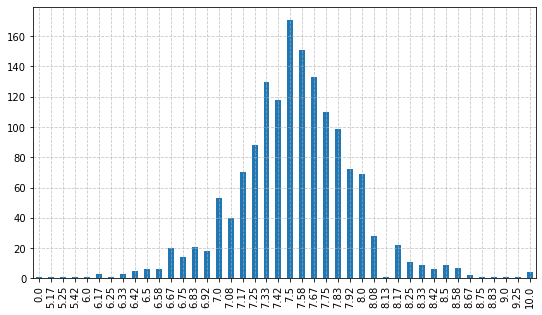

In [5]:
plt.figure(figsize = (9,5))
cupping_scores['Overall'].value_counts().sort_index().plot(kind = 'bar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [6]:
print(cupping_scores['Overall'].value_counts())

7.50     171
7.58     151
7.67     133
7.33     130
7.42     118
7.75     110
7.83      99
7.25      88
7.92      72
7.17      70
8.00      69
7.00      53
7.08      40
8.08      28
8.17      22
6.83      21
6.67      20
6.92      18
6.75      14
8.25      11
8.33       9
8.50       9
8.58       7
8.42       6
6.58       6
6.50       6
6.42       5
10.00      4
6.33       3
6.17       3
8.67       2
0.00       1
5.42       1
5.25       1
6.00       1
6.25       1
8.13       1
8.83       1
5.17       1
8.75       1
9.00       1
9.25       1
Name: Overall, dtype: int64


Set an arbitrary cutoff for the dependent variable (Overall) at 7.51 or higher getting classified as `great or 1`, and the remainder as `average or 0`.

In [7]:
cupping_score = cupping_scores.copy()
cupping_score['Overall'] = cupping_score['Overall'].apply(lambda x: 1 if x > 7.5 else 0)
cupping_score.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Overall
0,7.83,7.92,7.75,8.00,7.75,7.75,10.0,10.0,10.0,84.92,1
1,7.58,7.83,7.58,7.75,7.67,7.75,10.0,10.0,10.0,83.92,1
2,7.67,7.83,7.67,7.83,7.75,7.67,10.0,10.0,10.0,84.08,1
3,7.58,7.92,7.67,7.75,7.83,7.75,10.0,10.0,10.0,84.25,1
4,7.67,7.83,7.75,7.75,7.83,7.75,10.0,10.0,10.0,84.33,1


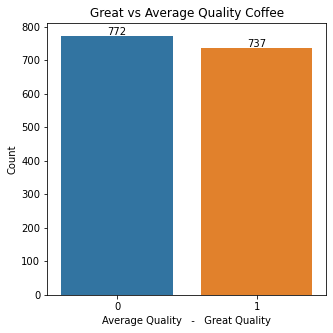

In [8]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Overall', data = cupping_score)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center')
plt.xlabel('Average Quality   -   Great Quality')
plt.ylabel('Count')
plt.title('Great vs Average Quality Coffee')
plt.show()

In [9]:
cupping_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,1509.0,7.585991,0.371316,0.0,7.42,7.58,7.75,8.75
Flavor,1509.0,7.548615,0.393472,0.0,7.33,7.58,7.75,8.83
Aftertaste,1509.0,7.425964,0.396179,0.0,7.25,7.42,7.67,8.67
Acidity,1509.0,7.554758,0.371626,0.0,7.33,7.58,7.75,8.75
Body,1509.0,7.534791,0.347488,0.0,7.33,7.50,7.75,8.58
Balance,1509.0,7.535726,0.391863,0.0,7.33,7.58,7.75,8.75
Uniformity,1509.0,9.853930,0.525392,0.0,10.00,10.00,10.00,10.00
Clean_Cup,1509.0,9.855017,0.721136,0.0,10.00,10.00,10.00,10.00
Sweetness,1509.0,9.915964,0.495834,0.0,10.00,10.00,10.00,10.00
Total_Cup_Points,1509.0,82.333612,3.378540,0.0,81.42,82.67,83.83,90.58


## **💡 Highlights of the Results**

**3 highlights after implementing kNN algorithm:**
1. The optimal no. of neighbors is 11 with an accuracy score of **88%**
2. The test accuracy exceeded the required 1.25PCC target accuracy of **62.53%**.
3. The features that affect the target most are `Flavor`, `Aftertaste`, and `Balance`.

## **🤖 kNN Implementation**

In [10]:
X = cupping_score.drop('Overall', axis = 1)
y = cupping_score['Overall']

Best Accuracy for KNN: 0.88


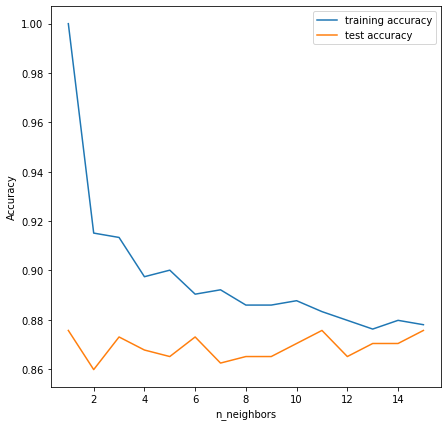

In [11]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize = (7,7))    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(f"Best Accuracy for KNN: {np.max(test_accuracy):.2f}")

### **📝 Evaluate Model Performance**

In [12]:
knn_pred = knn.predict(X_test)

In [13]:
print("K Nearest Neighbors Classifier:")
print("Classification Report:\n", classification_report(y_test, knn_pred))

K Nearest Neighbors Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       188
           1       0.89      0.86      0.87       190

    accuracy                           0.88       378
   macro avg       0.88      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378



### Proportion Chance Criteria

In [14]:
def PCC(target, plot=True, title=None):
    
    from collections import Counter
    state_counts = Counter(target)
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')
    num = (df_state[0]/df_state[0].sum())**2
    ret = 1.25*100*num.sum()
    
    if plot == True:
        plt.figure(figsize=(6,5))
        ax = sns.countplot(x=target)
        plt.title(f"{title}\n(1.25 PCC = {ret}%)", fontsize=15)
        plt.xticks(ticks=range(2), labels=['Bad', 'Good'])
        plt.show()

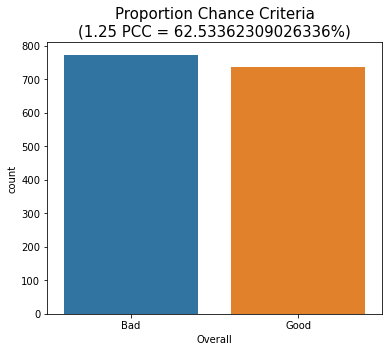

In [15]:
PCC(y, title="Proportion Chance Criteria")

## 📜**Discussion of Results**

### Top Features

In [16]:
print('Features with their corresponding correlation values to the target variable:\n\nFeature\t            Correlation')
print('-'*32)
print(cupping_score.corr().Overall[cupping_score.corr()[cupping_score.columns[-1]].abs().index.tolist()
                             [:-1]].sort_values(ascending=False))

Features with their corresponding correlation values to the target variable:

Feature	            Correlation
--------------------------------
Flavor              0.553295
Aftertaste          0.551368
Balance             0.526832
Acidity             0.486445
Total_Cup_Points    0.482450
Body                0.455300
Aroma               0.449248
Clean_Cup           0.120387
Uniformity          0.111149
Sweetness           0.062037
Name: Overall, dtype: float64


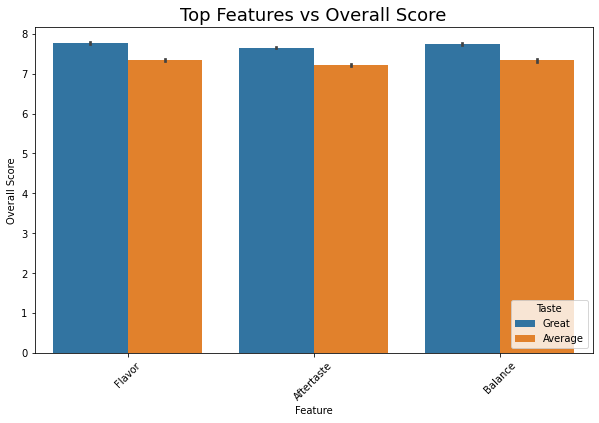

Mean value per feature:
Flavor
	Average: 7.34
	Great: 7.77
Aftertaste
	Average: 7.21
	Great: 7.65
Balance
	Average: 7.33
	Great: 7.75


In [17]:
top_features = cupping_score[['Flavor', 'Aftertaste', 'Balance', 'Overall']]
overall_score = ['Average', 'Great']

div = pd.melt(top_features, id_vars='Overall', var_name='Feature', value_name='Score')
div.loc[div.Overall==1,'Overall'] = 'Great'
div.loc[div.Overall==0,'Overall'] = 'Average'

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Score', hue='Overall', data=div)
plt.title('Top Features vs Overall Score', fontsize=18)
plt.xlabel('Feature')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.legend(title='Taste', loc=4)
plt.show()

print('Mean value per feature:')
for col in top_features.columns[:-1]:
    print(col)
    print('\tAverage: {0:.2f}'.format(top_features.loc[top_features.Overall == 0, col].mean()))
    print('\tGreat: {0:.2f}'.format(top_features.loc[top_features.Overall == 1, col].mean()))

### Additional Insights from Certification Information

In [18]:
coffee = pd.concat([certification_info, cupping_score], axis=1)
great = coffee[coffee['Overall'] == 1]

In [19]:
print('_'*115)
print()
print('\033[1mThe country where most of the highest-quality coffee beans were grown:', 
      great['Country_of_Origin'].value_counts().idxmax())
print()
print('\033[0mTop 10 countries\t        Count')
print('-'*38)
print(great['Country_of_Origin'].value_counts().head(10))
print()
print('_'*115)
print()
print('\033[1mThe region or geographical area where most of the highest-quality coffee beans were produced:', 
      great['Region'].value_counts().idxmax())
print()
print('\033[0mTop 5 regions\t  Count')
print('-'*24)
print(great['Region'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe altitude at which most of the highest-quality coffee beans were grown:', 
      great['Altitude'].value_counts().idxmax())
print()
print('\033[0mAltitude  Count')
print('-'*15)
print(great['Altitude'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe variety or type of coffee beans with the highest-quality:', 
      great['Variety'].value_counts().idxmax())
print()
print('\033[0mTypes\t   Count')
print('-'*16)
print(great['Variety'].value_counts().head(3))
print()
print('_'*115)
print()
print('\033[1mThe company or organization where most of the highest-quality coffee beans were processed:',
      great['Company'].value_counts().idxmax())
print()
print('\033[0mTop 5 companies\t                  Count')
print('-'*39)
print(great['Company'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe processing method that resulted in most of the highest-quality coffee beans:', 
      great['Processing_Method'].value_counts().idxmax())
print()
print('\033[0mTop 4 processing methods     Count')
print('-'*34)
print(great['Processing_Method'].value_counts().head(4))
print()
print('_'*115)
print()
print('\033[1mThe color of the highest-quality coffee bean:', great['Color'].value_counts().idxmax())
print()
print('\033[0mTop 3 colors    Count')
print('-'*21)
print(great['Color'].value_counts().head(3))
print()
print('_'*115)
print()
print('\033[1mThe moisture content of the highest-quality coffee bean:', great['Moisture'].value_counts().idxmax())
print()
print('\033[0mMoisture Count')
print('-'*14)
print(great['Moisture'].value_counts().head(5))

___________________________________________________________________________________________________________________

The country where most of the highest-quality coffee beans were grown: Colombia

Top 10 countries	        Count
--------------------------------------
Colombia                        135
Taiwan                           76
Guatemala                        75
Mexico                           72
Brazil                           63
Ethiopia                         52
United States (Hawaii)           41
Costa Rica                       39
Uganda                           24
Tanzania, United Republic Of     23
Name: Country_of_Origin, dtype: int64

___________________________________________________________________________________________________________________

The region or geographical area where most of the highest-quality coffee beans were produced: huila

Top 5 regions	  Count
------------------------
huila             74
kona              33
south of minas    33
orien